Candidate: Ivomar Brito Soares

Email: ivomarbsoares@gmail.com

## Table of Contents

<ul>
    <li>Importing Libraries</li>
    <li>Utility Methods</li>
    <li>Reading Training and Test Data Set</li>
    <li>Exploratory Data Analysis</li>
    <li>Pre-processing</li>
    <li>Splitting Training Dataset into Training and Test Sets</li>
    <li>Training and Testing Classification Models</li>
    <li>Using the Trained Model to Predict Output in the Test Set</li>
</ul>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import itertools 

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from datetime import datetime

from sklearn                 import metrics
from sklearn.metrics         import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble                 import AdaBoostClassifier
from sklearn.ensemble                 import GradientBoostingClassifier
from sklearn.tree                     import DecisionTreeClassifier

## Utility Methods

In [2]:
def numeric_exploratory_data_analysis(dataset, generate_csv=False):
    """
    Outputs a pandas dataframe with the dtypes, nan and zero value counts of all features. 
    Also outputs a csv file.
    """
    assert isinstance(dataset, pd.core.frame.DataFrame)
    assert isinstance(generate_csv, bool)

     # Shape of the a_dataset.
    print('Shape: {} \n'.format(dataset.shape))

    # Summary and statistical description of the a_dataset.
    print('Statistical Summary: \n {} \n'.format(dataset.describe()))
    features = list(dataset)

    numeric_analysis = pd.DataFrame(index=features, columns=['Dtypes',
                                                             '# of non NaN values',
                                                             '# of NaN values',
                                                             '# of non zero values',
                                                             '# of zero values',
                                                             '# of unique values',
                                                             'Unique values'])

    numeric_analysis['Dtypes']                = dataset.dtypes
    numeric_analysis['# of non NaN values']   = dataset.count()
    numeric_analysis['# of NaN values']      = len(dataset) - dataset.count()
    numeric_analysis['# of non zero values'] = dataset.astype(bool).sum(axis=0)
    numeric_analysis['# of zero values']     = len(dataset) - dataset.astype(bool).sum(axis=0)
    numeric_analysis['# of unique values']   = dataset.apply(pd.Series.nunique)
    numeric_analysis['Unique values']        = ''
 
    index = 0
    for feature in features:
        numeric_analysis.iloc[index, 6] = np.array_str(dataset[feature].unique())
        index = index + 1

    if generate_csv:
        numeric_analysis.to_csv(path_or_buf='numeric_analysis.csv')

    return numeric_analysis

def fit_predict_plot (X_train, X_test, y_train, y_test, model):    
    %time model.fit(X_train, y_train)
    y_test_pred  = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('Accuracy of training set: {}'.format(metrics.accuracy_score(y_train, y_train_pred)))
    print('Accuracy of testing set: {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
    plt.figure()
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cnf_matrix, ['Negative', 'Positive'], title='Confusion Matrix')
    plt.show()
    class_report = classification_report(y_test, y_test_pred)
    print(class_report)
    
def plot_confusion_matrix(cm, 
                          classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    """    
 
    print('Confusion matrix, without normalization')

    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

## Reading Training and Test Data Set

In [3]:
training_dataset = pd.read_csv('train.csv', sep=';')
testing_dataset = pd.read_csv('test.csv', sep=';')

In [4]:
training_dataset.head()

,Customer code,Risk level,Has CCTV server,"Individual, legal entity or public body",State,City,Neighborhood,Date/time,Event code,Confirmed
0,10049,5,0,0,SP,SAO CARLOS,JARDIM IPANEMA,2019-01-01 00:02:12.497,E131,1
1,10049,5,0,0,SP,SAO CARLOS,JARDIM IPANEMA,2019-01-01 00:02:17.440,E131,1
2,10049,5,0,0,SP,SAO CARLOS,JARDIM IPANEMA,2019-01-01 00:02:27.303,E131,1
3,11794,4,0,0,SP,SAO CARLOS,PARQUE SANTA MONICA,2019-01-01 00:12:09.100,E130,0
4,9658,5,1,0,SP,SAO CARLOS,CENTRO,2019-01-01 00:36:35.657,E131,1


In [5]:
testing_dataset.head()

,Customer code,Risk level,Has CCTV server,"Individual, legal entity or public body",State,City,Neighborhood,Date/time,Event code
0,8984,4,1,2,SP,SAO CARLOS,RESID MONS ROMEU TORTORELLI,2019-01-03 19:44:13.623,E130
1,8984,4,1,2,SP,SAO CARLOS,RESID MONS ROMEU TORTORELLI,2019-01-03 19:44:21.167,E130
2,8984,4,1,2,SP,SAO CARLOS,RESID MONS ROMEU TORTORELLI,2019-01-03 19:44:28.617,E130
3,8984,4,1,2,SP,SAO CARLOS,RESID MONS ROMEU TORTORELLI,2019-01-03 19:44:36.127,E130
4,8984,4,1,2,SP,SAO CARLOS,RESID MONS ROMEU TORTORELLI,2019-01-03 19:44:42.813,E130


## Exploratory Data Analysis

In [6]:
numeric_exploratory_data_analysis(training_dataset)

Shape: (1000, 10) 

Statistical Summary: 
        Customer code   Risk level  Has CCTV server  \
count    1000.000000  1000.000000      1000.000000   
mean    11321.449000     3.864000         0.168000   
std      1190.160357     0.593174         0.374053   
min      4572.000000     2.000000         0.000000   
25%     11480.000000     4.000000         0.000000   
50%     11687.000000     4.000000         0.000000   
75%     11742.000000     4.000000         0.000000   
max     11896.000000     5.000000         1.000000   

       Individual, legal entity or public body    Confirmed  
count                              1000.000000  1000.000000  
mean                                  0.394000     0.095000  
std                                   0.557741     0.293362  
min                                   0.000000     0.000000  
25%                                   0.000000     0.000000  
50%                                   0.000000     0.000000  
75%                                 

,Dtypes,# of non NaN values,# of NaN values,# of non zero values,# of zero values,# of unique values,Unique values
Customer code,int64,1000,0,1000,0,153,[10049 11794 9658 11445 11401 11765 11724 117...
Risk level,int64,1000,0,1000,0,4,[5 4 3 2]
Has CCTV server,int64,1000,0,168,832,2,[0 1]
"Individual, legal entity or public body",int64,1000,0,358,642,3,[0 1 2]
State,object,1000,0,1000,0,1,['SP']
City,object,1000,0,1000,0,4,['SAO CARLOS' 'IBATE' 'RIBEIRAO PRETO' 'RIBEIR...
Neighborhood,object,1000,0,1000,0,66,['JARDIM IPANEMA' 'PARQUE SANTA MONICA' 'CENTR...
Date/time,object,1000,0,1000,0,995,['2019-01-01 00:02:12.497' '2019-01-01 00:02:1...
Event code,object,1000,0,1000,0,16,['E131' 'E130' '1902' 'E134' 'E301' 'E132' 'E1...
Confirmed,int64,1000,0,95,905,2,[1 0]


Main conclusions of the training set shown above:

<ul>
    <li>It has no missing values (NaN).</li>
    <li>The State field has a single value (SP) and does not contribute to the prediction model and can be ignored.</li>
    <li>Client Code, Has CCTV server and Individual, legal entity or public body although they have integer values, they are categorical variables with independent values and will be treated with one hot encoding.</li>
    <li>The data set is unbalanced in the target variable (target). Confirmed with 905 values equal to zero and 95 values equal to 1.</li>
    <li> The data set has categorical, numeric and date / time variables. </li>
    <li> As the target variable is categorical, we will have a learning model of the classification type. </li>
</ul>

In [7]:
training_dataset['Risk level'].iplot(
    kind='hist',
    bins=100,
    xTitle='Risk level',
    linecolor='black',
    yTitle='count',
    title='Distribution of risk level')

The numerical variable Risk Levels does not have a defined distribution, presenting more values in number 4.

In [8]:
numeric_exploratory_data_analysis(testing_dataset)

Shape: (1000, 9) 

Statistical Summary: 
        Customer code  Risk level  Has CCTV server  \
count    1000.000000  1000.00000      1000.000000   
mean    11390.575000     3.93900         0.340000   
std      1141.913486     0.49752         0.473946   
min      4572.000000     1.00000         0.000000   
25%     11634.500000     4.00000         0.000000   
50%     11767.000000     4.00000         0.000000   
75%     11842.000000     4.00000         1.000000   
max     11900.000000     5.00000         1.000000   

       Individual, legal entity or public body  
count                              1000.000000  
mean                                  0.497000  
std                                   0.618363  
min                                   0.000000  
25%                                   0.000000  
50%                                   0.000000  
75%                                   1.000000  
max                                   2.000000   



,Dtypes,# of non NaN values,# of NaN values,# of non zero values,# of zero values,# of unique values,Unique values
Customer code,int64,1000,0,1000,0,117,[ 8984 11684 11319 11619 11306 10049 11838 118...
Risk level,int64,1000,0,1000,0,5,[4 3 5 2 1]
Has CCTV server,int64,1000,0,340,660,2,[1 0]
"Individual, legal entity or public body",int64,1000,0,431,569,3,[2 1 0]
State,object,1000,0,1000,0,1,['SP']
City,object,1000,0,1000,0,4,['SAO CARLOS' 'IBATE' 'RIBEIRAO PRETO' 'ITIRAP...
Neighborhood,object,1000,0,1000,0,48,['RESID MONS ROMEU TORTORELLI' 'JARDIM ARAUCAR...
Date/time,object,1000,0,1000,0,999,['2019-01-03 19:44:13.623' '2019-01-03 19:44:2...
Event code,object,1000,0,1000,0,13,['E130' 'E301' 'E131' '1902' 'E122' 'E134' 'E1...


Main conclusions of the test set shown above:

<ul>
<li>The same conclusions made for the training set apply to the test set shown above.</li>
<li>The test set does not have the target variable that will be predicted using the training done in the training set.</li>
</ul>

In [9]:
testing_dataset['Risk level'].iplot(
    kind='hist',
    bins=100,
    xTitle='Risk level',
    linecolor='black',
    yTitle='count',
    title='Risk level distribution')

The numerical variable Risk Levels does not have a defined distribution, presenting more values in number 4.

## Pre-processing

In [10]:
# Removing the 'State' column that is unnecessary for the prediction model.
training_dataset.drop("State", axis = 1, inplace = True)
testing_dataset.drop("State", axis = 1, inplace = True)

print(training_dataset.shape)
print(testing_dataset.shape)

(1000, 9)
(1000, 8)


In [11]:
#Concatenating the training and test datasets into a single dataset to perform pre-processing on both
#simultaneously.
ntrain = training_dataset.shape[0]
ntest  = testing_dataset.shape[0]

y_train = training_dataset['Confirmed']
training_dataset.drop(['Confirmed'], axis = 1, inplace=True)

dataset_total = pd.concat((training_dataset,testing_dataset)).reset_index(drop=True)
print(dataset_total.shape)

(2000, 8)


In [12]:
# Transforming the loaded variables as numeric which are actually categorical.
dataset_total['Customer code'] = dataset_total['Customer code'].apply(str)
dataset_total['Has CCTV server'] = dataset_total['Has CCTV server'].apply(str)
dataset_total['Individual, legal entity or public body'] = dataset_total['Individual, legal entity or public body'].apply(str)

In [13]:
# Extracting the variables (features) from the Date/time column

# It was decided not to create a variable for the year and the month as all occurrences 
# happened in the year 2019 and in the month of January, adding no value to the prediction model.
day_of_week = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f" ).weekday()
dataset_total['day_of_week'] = dataset_total['Date/time'].map(day_of_week)

hour = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f" ).hour
dataset_total['hour'] = dataset_total['Date/time'].map(hour)

dataset_total.drop(['Date/time'], axis = 1, inplace=True)
dataset_total.head()

,Customer code,Risk level,Has CCTV server,"Individual, legal entity or public body",City,Neighborhood,Event code,day_of_week,hour
0,10049,5,0,0,SAO CARLOS,JARDIM IPANEMA,E131,1,0
1,10049,5,0,0,SAO CARLOS,JARDIM IPANEMA,E131,1,0
2,10049,5,0,0,SAO CARLOS,JARDIM IPANEMA,E131,1,0
3,11794,4,0,0,SAO CARLOS,PARQUE SANTA MONICA,E130,1,0
4,9658,5,1,0,SAO CARLOS,CENTRO,E131,1,0


In [14]:
# Getting the dummy categorical variables (one hot encoding).
dataset_total = pd.get_dummies(dataset_total)
print(dataset_total.shape)

(2000, 330)


In [15]:
# Getting the new training and test sets.
training_dataset = dataset_total[:ntrain]
testing_dataset  = dataset_total[ntrain:]

## Splitting Training Dataset into Training and Test Sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(training_dataset, y_train, test_size=0.2, random_state=42, stratify=y_train)

## Training and Testing Classification Models

------------------------------------------------------------------------------
DecisionTreeClassifier
------------------------------------------------------------------------------
CPU times: user 42.6 ms, sys: 3.87 ms, total: 46.5 ms
Wall time: 159 ms
Accuracy of training set: 1.0
Accuracy of testing set: 1.0
Confusion matrix, without normalization
[[181   0]
 [  0  19]]


<Figure size 432x288 with 0 Axes>

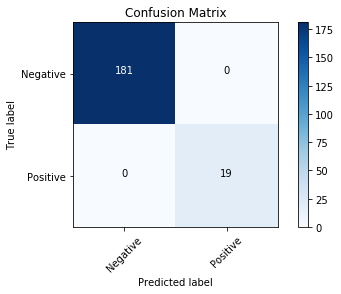

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00        19

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

------------------------------------------------------------------------------
GradientBoostingClassifier
------------------------------------------------------------------------------
CPU times: user 378 ms, sys: 277 µs, total: 378 ms
Wall time: 377 ms
Accuracy of training set: 1.0
Accuracy of testing set: 1.0
Confusion matrix, without normalization
[[181   0]
 [  0  19]]


<Figure size 432x288 with 0 Axes>

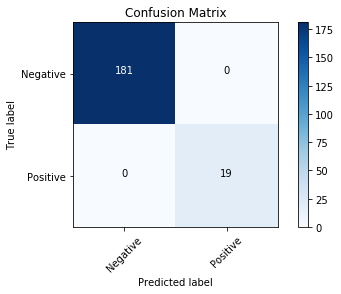

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00        19

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

------------------------------------------------------------------------------
AdaBoostClassifier
------------------------------------------------------------------------------
CPU times: user 227 ms, sys: 0 ns, total: 227 ms
Wall time: 226 ms
Accuracy of training set: 1.0
Accuracy of testing set: 1.0
Confusion matrix, without normalization
[[181   0]
 [  0  19]]


<Figure size 432x288 with 0 Axes>

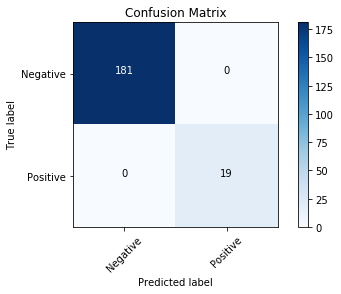

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00        19

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [17]:
models = []

models.append(('DecisionTreeClassifier',        DecisionTreeClassifier()))
models.append(('GradientBoostingClassifier',    GradientBoostingClassifier()))
models.append(('AdaBoostClassifier',            AdaBoostClassifier()))

for name, model in models:
    print('------------------------------------------------------------------------------')
    print(name)
    print('------------------------------------------------------------------------------')
    fit_predict_plot(X_train, X_test, y_train, y_test, model)

The three models tested have perfect accuracy as can be seen in the data set above.

## Using the Trained Model to Predict Output in the Test Set

In [18]:
for name, model in models:
    print('------------------------------------------------------------------------------')
    print(name)
    print('------------------------------------------------------------------------------')
    y_test_predict = model.predict(testing_dataset)
    print(y_test_predict)

------------------------------------------------------------------------------
DecisionTreeClassifier
------------------------------------------------------------------------------
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 